## Loading Packages and Files

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## EDA
### ***Sephora Products***

In [2]:
df_products = pd.read_csv('product_info.csv')
df_products.head(2)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0


In [3]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

<em>Observations :</em>
- We need to change brand_id type (int -> obj)
- check ingredients list of each product
- drop unnecessary columns for the analysis
- filter to only Skincare products


In [4]:
df_products = df_products[df_products.primary_category == "Skincare"]
df_products.drop(columns=['primary_category','value_price_usd','sale_price_usd','child_count','child_max_price','child_min_price','variation_type','variation_value','variation_desc','size', 'highlights'], inplace=True)

In [5]:
print(f'Rows : {df_products.shape[0]} \nCols : {df_products.shape[1]}')

Rows : 2420 
Cols : 16


In [6]:
df_products.brand_id = df_products['brand_id'].astype(str)

In [7]:
df_products = df_products[(df_products.ingredients.notnull()) & (df_products['reviews'].notnull())]

In [8]:
null_values = df_products.isnull().sum()
for column, count in null_values.items():
    print(f"Column '{column}' has {count} null values of {len(df_products)} values.")

Column 'product_id' has 0 null values of 2224 values.
Column 'product_name' has 0 null values of 2224 values.
Column 'brand_id' has 0 null values of 2224 values.
Column 'brand_name' has 0 null values of 2224 values.
Column 'loves_count' has 0 null values of 2224 values.
Column 'rating' has 0 null values of 2224 values.
Column 'reviews' has 0 null values of 2224 values.
Column 'ingredients' has 0 null values of 2224 values.
Column 'price_usd' has 0 null values of 2224 values.
Column 'limited_edition' has 0 null values of 2224 values.
Column 'new' has 0 null values of 2224 values.
Column 'online_only' has 0 null values of 2224 values.
Column 'out_of_stock' has 0 null values of 2224 values.
Column 'sephora_exclusive' has 0 null values of 2224 values.
Column 'secondary_category' has 0 null values of 2224 values.
Column 'tertiary_category' has 341 null values of 2224 values.


In [9]:
df_by_category = df_products[['secondary_category','tertiary_category']].groupby(by=['secondary_category','tertiary_category']).size().reset_index(name='count')

In [10]:
df_by_category

,secondary_category,tertiary_category,count
0,Cleansers,Blotting Papers,1
1,Cleansers,Exfoliators,41
2,Cleansers,Face Wash & Cleansers,212
3,Cleansers,Face Wipes,5
4,Cleansers,Makeup Removers,8
5,Cleansers,Toners,77
6,Eye Care,Eye Creams & Treatments,168
7,Eye Care,Eye Masks,14
8,High Tech Tools,Anti-Aging,19
9,High Tech Tools,Teeth Whitening,5


In [11]:
px.sunburst(df_by_category,values='count',path=['secondary_category','tertiary_category'])

### Sephora Products Reviews

In [12]:
df_1 = pd.read_csv('reviews_0-250.csv', low_memory=False)
df_2 = pd.read_csv('reviews_250-500.csv', low_memory=False)
df_3 = pd.read_csv('reviews_500-750.csv', low_memory=False)
df_4 = pd.read_csv('reviews_750-1250.csv', low_memory=False)
df_5 = pd.read_csv('reviews_1250-end.csv', low_memory=False)
df_reviews = pd.concat([df_1,df_2,df_3,df_4,df_5],axis=0)
df_reviews.head(2)

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [13]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094411 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 982854 n

<em>Observations :</em>
- drop useless columns
- check null values

In [14]:
# df_reviews.rename(columns={'Unnamed: 0':'index'}, inplace=True)
df_reviews.drop(columns=['Unnamed: 0','total_feedback_count','total_neg_feedback_count','total_pos_feedback_count','skin_tone','eye_color','skin_type','hair_color'], inplace=True)

In [15]:
df_reviews = df_reviews[df_reviews.review_title.notnull()]

In [16]:
null_values = df_reviews.isnull().sum()
for column, count in null_values.items():
    print(f"Column '{column}' has {count} null values of {len(df_reviews)} values.")

Column 'author_id' has 0 null values of 783757 values.
Column 'rating' has 0 null values of 783757 values.
Column 'is_recommended' has 147934 null values of 783757 values.
Column 'helpfulness' has 389383 null values of 783757 values.
Column 'submission_time' has 0 null values of 783757 values.
Column 'review_text' has 0 null values of 783757 values.
Column 'review_title' has 0 null values of 783757 values.
Column 'product_id' has 0 null values of 783757 values.
Column 'product_name' has 0 null values of 783757 values.
Column 'brand_name' has 0 null values of 783757 values.
Column 'price_usd' has 0 null values of 783757 values.


In [17]:
df_reviews[['rating','is_recommended']].groupby(by=['rating','is_recommended']).size().reset_index(name='count').sort_values(by='rating',ascending=False)

,rating,is_recommended,count
8,5,0.0,518
9,5,1.0,412278
6,4,0.0,3719
7,4,1.0,101246
4,3,0.0,31037
5,3,1.0,16211
2,2,0.0,31195
3,2,1.0,1172
0,1,0.0,38176
1,1,1.0,271


<em>Observations :</em>
- Giving 5 stars for the rating doesn't mean to be recommended


Text(0.5, 0.98, 'Top 10 Products')

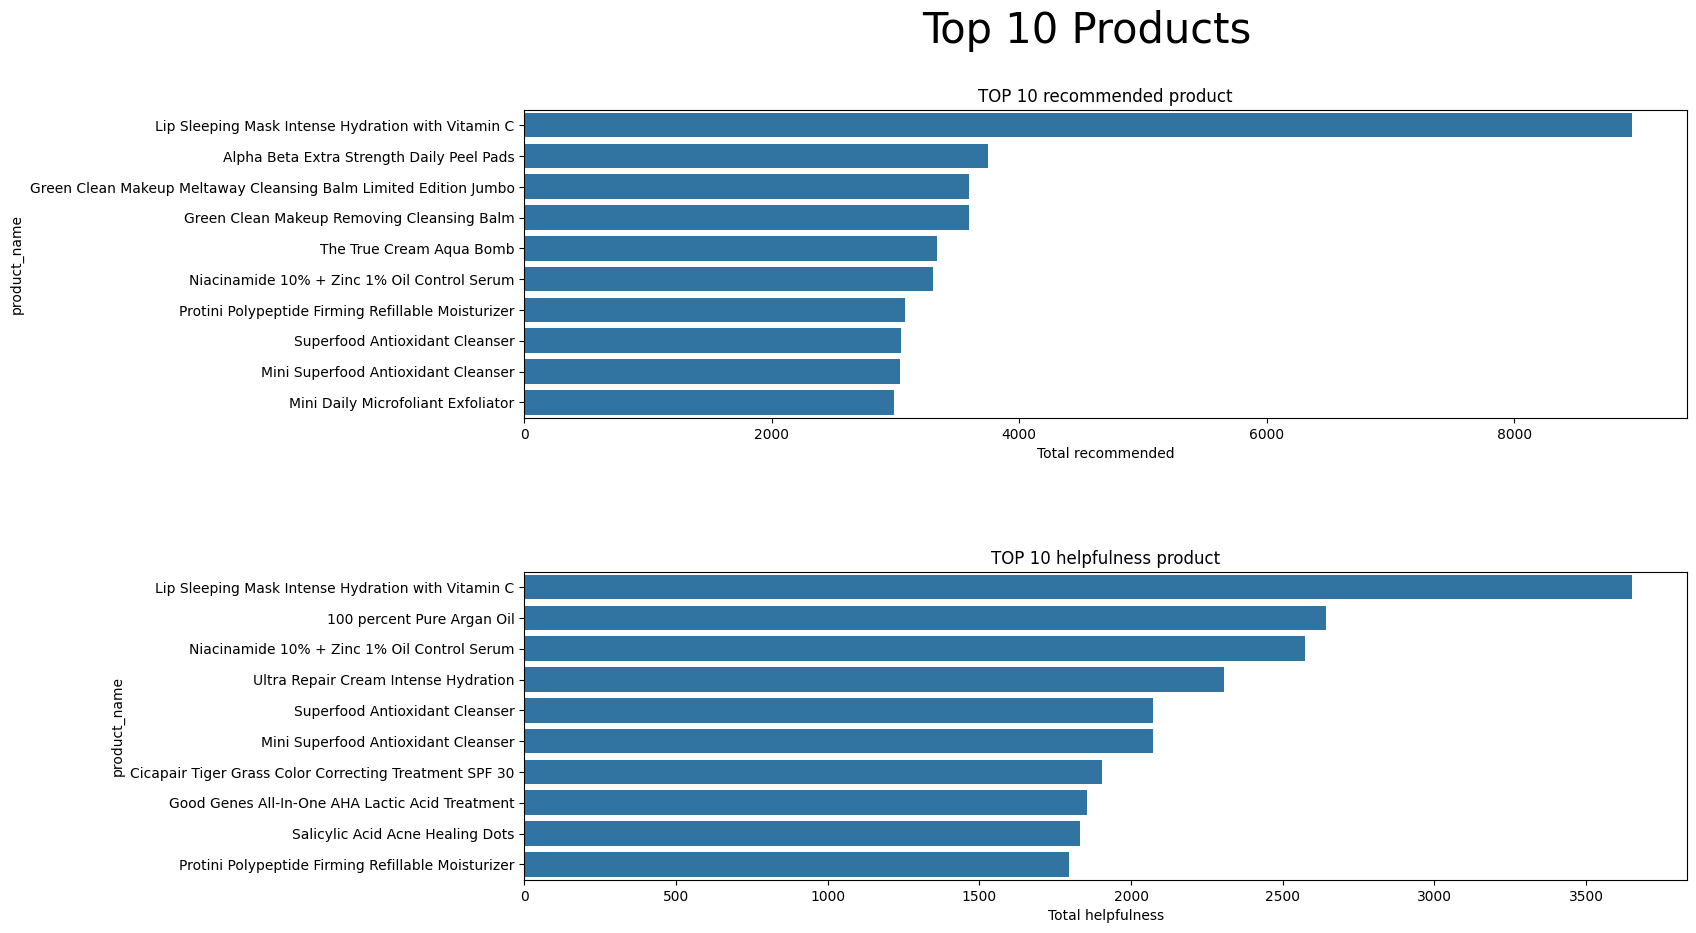

In [18]:
calcul_top = df_reviews.groupby(['product_id','product_name'])
 
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize= (15,10))
fig.subplots_adjust(hspace=0.5)
 
most_reccomended = calcul_top.sum(numeric_only=True)['is_recommended'].reset_index().sort_values('is_recommended',ascending=False).head(10)
sns.barplot(most_reccomended,x='is_recommended',y='product_name',ax=ax1)
ax1.set_title("TOP 10 recommended product")
ax1.set_xlabel("Total recommended")
 
most_helpfulness = calcul_top.sum(numeric_only=True)['helpfulness'].reset_index().sort_values('helpfulness',ascending=False).head(10)
sns.barplot(most_helpfulness,x='helpfulness',y='product_name',ax=ax2)
ax2.set_title("TOP 10 helpfulness product")
ax2.set_xlabel("Total helpfulness")
 
plt.suptitle("Top 10 Products",fontsize=30)

In [19]:
# def filter_products(df, product_ids):
#     return df[df['product_id'].isin(product_ids)]

# # Using the function to filter df_review based on list_products_review_null
# filtered_df = filter_products(df_review, list_products_review_null)

# filtered_df

In [20]:
df = df_reviews.merge(df_products,how='inner',on=['product_id','product_name','brand_name'])
df.head(2)

,author_id,rating_x,is_recommended,helpfulness,submission_time,review_text,review_title,product_id,product_name,brand_name,...,reviews,ingredients,price_usd_y,limited_edition,new,online_only,out_of_stock,sephora_exclusive,secondary_category,tertiary_category
0,1741593524,5,1.0,1.0,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,...,1.0,"['Water (Aqua), Dipropylene Glycol, Peg-6 Capr...",19.0,0,0,1,0,0,Cleansers,NaN
1,31423088263,1,0.0,NaN,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,...,16118.0,"['Diisostearyl Malate, Hydrogenated Polyisobut...",24.0,0,0,0,0,1,Lip Balms & Treatments,NaN


In [21]:
df.shape

(767222, 24)

In [22]:
null_values = df.isnull().sum()
for column, count in null_values.items():
    print(f"Column '{column}' has {count} null values of {len(df)} values.")

Column 'author_id' has 0 null values of 767222 values.
Column 'rating_x' has 0 null values of 767222 values.
Column 'is_recommended' has 141530 null values of 767222 values.
Column 'helpfulness' has 382219 null values of 767222 values.
Column 'submission_time' has 0 null values of 767222 values.
Column 'review_text' has 0 null values of 767222 values.
Column 'review_title' has 0 null values of 767222 values.
Column 'product_id' has 0 null values of 767222 values.
Column 'product_name' has 0 null values of 767222 values.
Column 'brand_name' has 0 null values of 767222 values.
Column 'price_usd_x' has 0 null values of 767222 values.
Column 'brand_id' has 0 null values of 767222 values.
Column 'loves_count' has 0 null values of 767222 values.
Column 'rating_y' has 0 null values of 767222 values.
Column 'reviews' has 0 null values of 767222 values.
Column 'ingredients' has 0 null values of 767222 values.
Column 'price_usd_y' has 0 null values of 767222 values.
Column 'limited_edition' has 

In [23]:
df.drop(columns=['helpfulness','tertiary_category'], inplace=True)

In [24]:
df = df[df.is_recommended.notnull()]
null_values = df.isnull().sum()
for column, count in null_values.items():
    print(f"Column '{column}' has {count} null values of {len(df)} values.")

Column 'author_id' has 0 null values of 625692 values.
Column 'rating_x' has 0 null values of 625692 values.
Column 'is_recommended' has 0 null values of 625692 values.
Column 'submission_time' has 0 null values of 625692 values.
Column 'review_text' has 0 null values of 625692 values.
Column 'review_title' has 0 null values of 625692 values.
Column 'product_id' has 0 null values of 625692 values.
Column 'product_name' has 0 null values of 625692 values.
Column 'brand_name' has 0 null values of 625692 values.
Column 'price_usd_x' has 0 null values of 625692 values.
Column 'brand_id' has 0 null values of 625692 values.
Column 'loves_count' has 0 null values of 625692 values.
Column 'rating_y' has 0 null values of 625692 values.
Column 'reviews' has 0 null values of 625692 values.
Column 'ingredients' has 0 null values of 625692 values.
Column 'price_usd_y' has 0 null values of 625692 values.
Column 'limited_edition' has 0 null values of 625692 values.
Column 'new' has 0 null values of 6

In [25]:
df.rename(columns={"rating_x":'rating_review','price_usd_x':'price_usd_review','rating_y':'rating_product','price_usd_y':'price_usd_product'},inplace=True)

In [26]:
# sns.pairplot(df)

In [27]:
df[['rating_review','is_recommended','new','online_only','out_of_stock', 'limited_edition','sephora_exclusive']].groupby(by=['rating_review','is_recommended']).sum().sort_values('rating_review',ascending=False)

new  online_only  out_of_stock  \
rating_review is_recommended                                     
5             0.0                21           63            23   
              1.0             14386        41044         12211   
4             0.0                83          480           125   
              1.0              2950        12566          3215   
3             0.0               644         3336           945   
              1.0               411         1958           493   
2             0.0               552         2701           951   
              1.0                25          112            43   
1             0.0               555         2907          1285   
              1.0                 6           15             8   

                              limited_edition  sephora_exclusive  
rating_review is_recommended                                      
5             0.0                           9                186  
              1.0                        7913             150008  
4             0.0                          78               1178  
              1.0                        1662              34460  
3             0.0                         604              11419  
              1.0                         305               5693  
2             0.0                         609              12347  
              1.0                          20                438  
1             0.0                         671              14469  
              1.0                           2                110

In [1]:
plt.bar(df['rating_review'],df['price_usd_review'])

NameError: name 'plt' is not defined